***Analyzing the trends of COVID-19 by:***

Using pandas to accumulate data from multiple data files

Using plotly (visualization library) to create interactive visualizations

Using Facebooks prophet library to make time series models

Visualizing the prediction by combining these technologie



**Dataset- Covid_19_clean_complete**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly 
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')


In [ ]:
covid = pd.read_csv('covid_19_clean_complete.csv', parse_dates=['Date'])

In [ ]:
covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,2020-01-22,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,2020-01-22,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,2020-01-22,0.0,0.0,0.0


In [ ]:
covid.rename(columns={'Province/State':  'state', 'Country/Region': 'country', 'Lat':  'lat', 'Long': 'long', 'Date': 'date', 
                      'Confirmed':  'confirmed', 'Deaths': 'deaths', 'Recovered': 'recovered'}, inplace= True)

In [ ]:
covid['active'] =  covid['confirmed']- covid['deaths'] - covid['recovered']

In [ ]:
top =  covid[covid['date']==covid['date'].max()]
covid_world = top.groupby('country')['confirmed', 'active', 'deaths'].sum().reset_index()

In [ ]:
covid_world.tail()

,country,confirmed,active,deaths
178,Uzbekistan,43.0,43.0,0.0
179,Venezuela,70.0,55.0,0.0
180,Vietnam,113.0,96.0,0.0
181,Zambia,3.0,3.0,0.0
182,Zimbabwe,3.0,3.0,0.0


In [ ]:
figure= px.choropleth(covid_world,  locations= 'country', locationmode= 'country names', color= 'active', hover_name= 'country', range_color=[1,1000],
                      color_continuous_scale='Peach',  title= 'Countries  with Active Cases')
figure.show()

[Text(0, 0.5, 'Total cases'), Text(0.5, 0, 'Dates')]

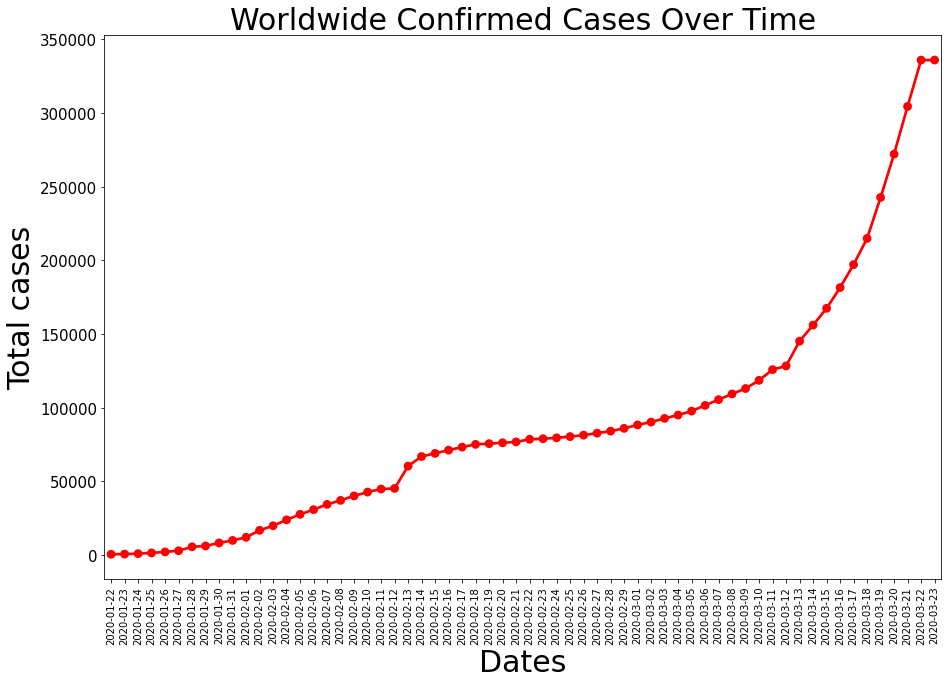

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=  90, fontsize=10)
plt.yticks(fontsize= 15)
plt.xlabel('Dates', fontsize =30)
plt.ylabel('Total cases', fontsize =30)
plt.title('Worldwide Confirmed Cases Over Time', fontsize =30)
total_cases = covid.groupby('date')['date', 'confirmed'].sum().reset_index()
total_cases['date']= pd.to_datetime(total_cases['date'])

ax =  sns.pointplot(x= total_cases.date.dt.date, y= total_cases.confirmed, color='r')
ax.set(xlabel='Dates', ylabel='Total cases')

In [ ]:
top_actives =  top.groupby(by = 'country')['active'].sum().sort_values(ascending= False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

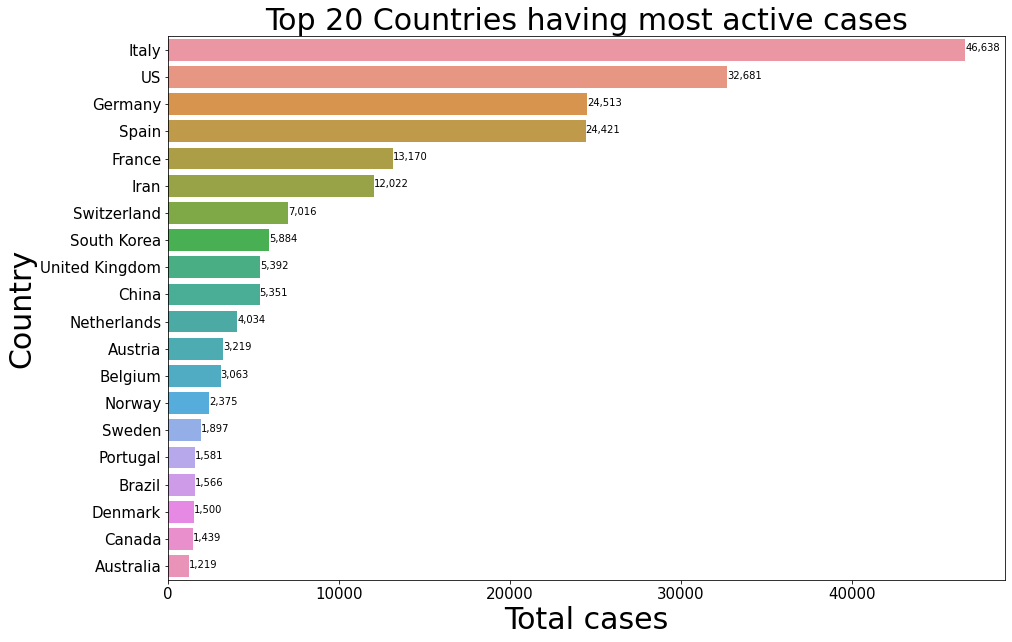

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel('Total cases', fontsize= 30)
plt.ylabel('Country', fontsize =30)
plt.title('Top 20 Countries having most active cases', fontsize = 30)
ax = sns.barplot(x= top_actives.active, y = top_actives.country)
for i, (value, name) in enumerate(zip(top_actives.active, top_actives.country)):
  ax.text(value, i- .05, f'{value:,.0f}', size= 10, ha= 'left',  va= 'center')
ax.set(xlabel='Total cases', ylabel= 'Country')  

In [ ]:
top_deaths =  top.groupby(by = 'country')['deaths'].sum().sort_values(ascending= False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

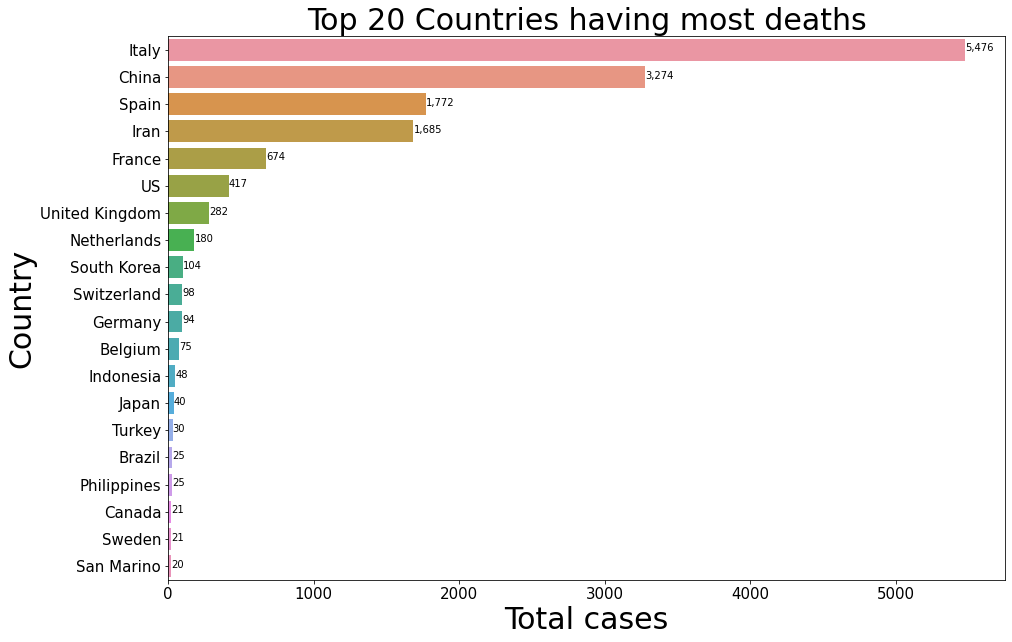

In [ ]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.xlabel('Total cases', fontsize= 30)
plt.ylabel('Country', fontsize =30)
plt.title('Top 20 Countries having most deaths', fontsize = 30)
ax = sns.barplot(x= top_deaths.deaths, y = top_deaths.country)
for i, (value, name) in enumerate(zip(top_deaths.deaths, top_deaths.country)):
  ax.text(value, i- .05, f'{value:,.0f}', size= 10, ha= 'left',  va= 'center')
ax.set(xlabel='Total cases', ylabel= 'Country')  

In [ ]:
china = covid[covid.country =='China']
china = china.groupby(by='date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()

In [ ]:
us = covid[covid.country =='US']
us =  us.groupby(by='date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
us = us.iloc[33:].reset_index().drop('index', axis  =1)

In [ ]:
italy = covid[covid.country =='Italy']
italy =  italy.groupby(by='date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
italy = italy.iloc[9:].reset_index().drop('index', axis  =1)

In [ ]:
india = covid[covid.country =='India']
india =  india.groupby(by='date')['recovered', 'deaths', 'confirmed', 'active'].sum().reset_index()
india = india.iloc[8:].reset_index().drop('index', axis  =1)

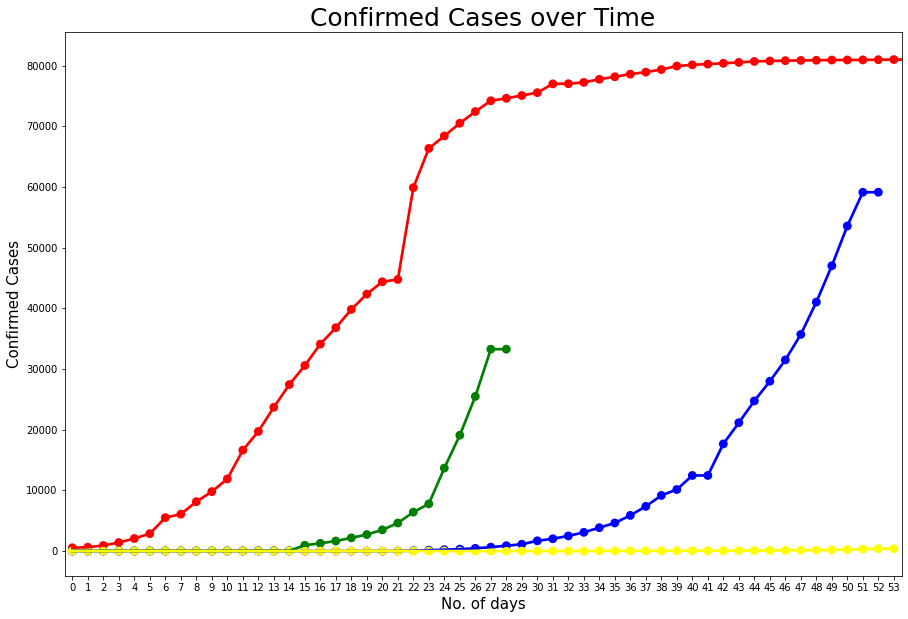

In [ ]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.confirmed, color='Red')
sns.pointplot(us.index, us.confirmed, color='Green')
sns.pointplot(italy.index, italy.confirmed, color='Blue')
sns.pointplot(india.index, india.confirmed, color='Yellow')

plt.title('Confirmed Cases over Time', fontsize=25)
plt.xlabel('No. of days', fontsize=15)
plt.ylabel('Confirmed Cases', fontsize  = 15)
plt.show()

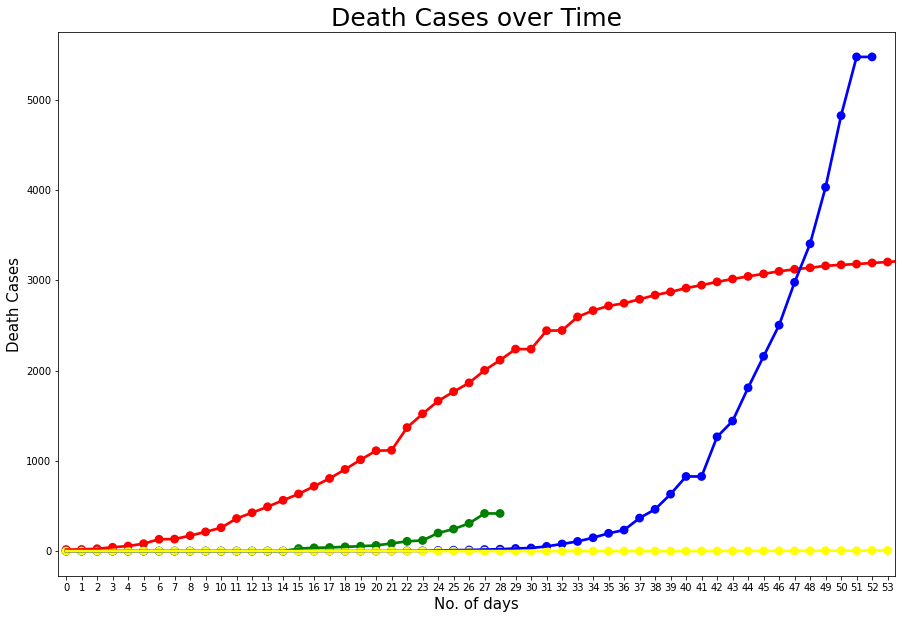

In [ ]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.deaths, color='Red')
sns.pointplot(us.index, us.deaths, color='Green')
sns.pointplot(italy.index, italy.deaths, color='Blue')
sns.pointplot(india.index, india.deaths, color='Yellow')

plt.title('Death Cases over Time', fontsize=25)
plt.xlabel('No. of days', fontsize=15)
plt.ylabel('Death Cases', fontsize  = 15)
plt.show()

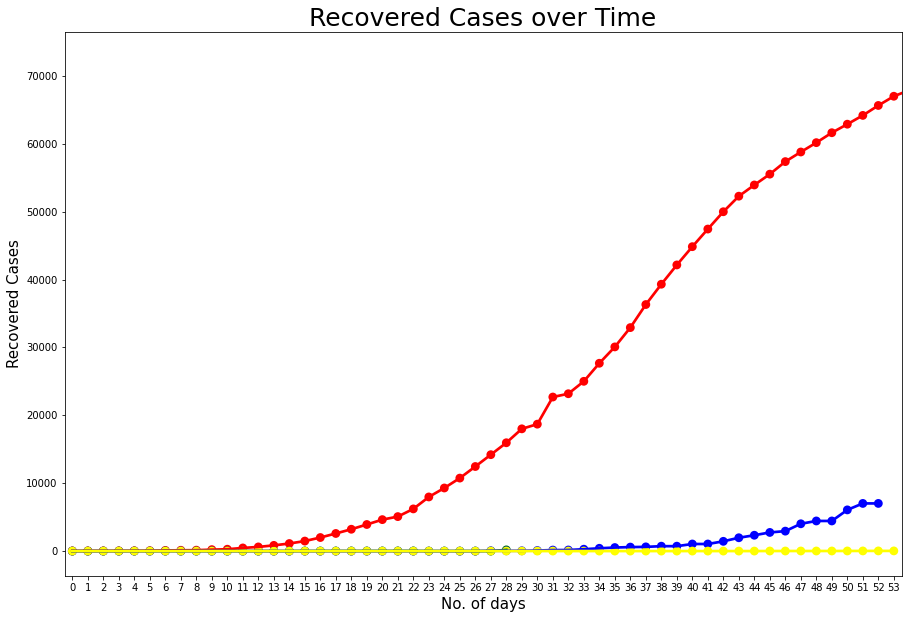

In [ ]:
plt.figure(figsize=(15,10))

sns.pointplot(china.index, china.recovered, color='Red')
sns.pointplot(us.index, us.recovered, color='Green')
sns.pointplot(italy.index, italy.recovered, color='Blue')
sns.pointplot(india.index, india.recovered, color='Yellow')

plt.title('Recovered Cases over Time', fontsize=25)
plt.xlabel('No. of days', fontsize=15)
plt.ylabel('Recovered Cases', fontsize  = 15)
plt.show()

**Dataset- Covid_19_india**

In [ ]:
c_india= pd.read_excel('/content/covid_19_india.xlsx')

In [ ]:
c_india.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [ ]:
# Renaming Total Confirmed cases (Indian National) as tcci and Total Confirmed cases ( Foreign National ) as tccf

c_india.rename(columns={'Name of State / UT': 'state/ut', 'Total Confirmed cases (Indian National)': 'tcci', 
                        'Total Confirmed cases ( Foreign National )': 'tccf', 'Cured': 'cured',  'Death': 'death'}, inplace= True)

In [ ]:
del  c_india['S. No.']

In [ ]:
c_india.head()

,state/ut,tcci,tccf,Cured,Death
0,Andhra Pradesh,9,0,0,0
1,Bihar,3,0,0,1
2,Chhattisgarh,1,0,0,0
3,Delhi,30,1,6,1
4,Gujarat,32,1,0,1


In [ ]:
c_india['Total cases'] = c_india['tcci'] + c_india['tccf']

In [ ]:
dbd_india= pd.read_excel('/content/per_day_cases.xlsx', parse_dates = True, sheet_name= 'India')
dbd_italy= pd.read_excel('/content/per_day_cases.xlsx', parse_dates = True, sheet_name= 'Italy')
dbd_korea= pd.read_excel('/content/per_day_cases.xlsx', parse_dates = True, sheet_name= 'Korea')
dbd_wuhan= pd.read_excel('/content/per_day_cases.xlsx', parse_dates = True, sheet_name= 'Wuhan')


In [ ]:
c_india['Total Active']= c_india['Total cases'] - c_india['death'] -c_india['cured']
total_active =  c_india['Total Active'].sum()
print('Total number of active Covid 19 cases across  India:', total_active)
Tot_cases = c_india.groupby('state/ut')['Total Active'].sum().sort_values(ascending = False).to_frame()
Tot_cases.style.background_gradient(cmap='Blues_r')

Total number of active Covid 19 cases across  India: 512


,Total Active
state/ut,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


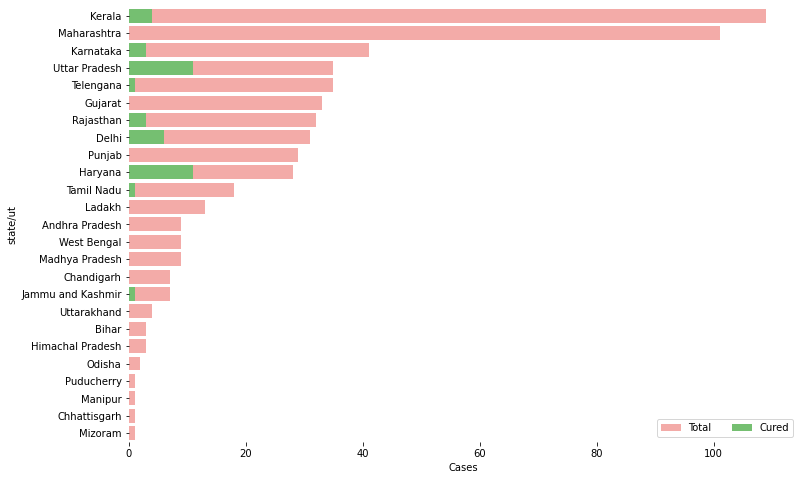

In [ ]:
f, ax = plt.subplots(figsize=(12,8))
data = c_india[['state/ut', 'Total cases', 'cured', 'death']]
data.sort_values('Total cases', ascending = False, inplace= True)
sns.set_color_codes("pastel")
sns.barplot(x='Total cases', y= 'state/ut', data = data, label= 'Total', color= 'r')

sns.set_color_codes("muted")
sns.barplot(x='cured', y= 'state/ut', data = data, label= 'Cured', color= 'g')
ax.legend(ncol=2, loc= 'lower right', frameon = True)
ax.set(ylabel='state/ut', xlabel = 'Cases')
sns.despine(left=True, bottom=True)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=dbd_india['Date'], y= dbd_india['Total Cases'], mode = 'lines+markers', name= 'Total cases'))
fig.update_layout(title_text= 'Trend of Corona Viru Cases in India (Cumulative Cases)',plot_bgcolor = 'rgb(230,230,230)' )
fig.show()

In [ ]:
fig= px.bar(dbd_india, x='Date', y='New Cases', barmode= 'group', height = 400)
fig.update_layout(title_text= 'Corona Virus  Cases in India  on  Daily Basis', plot_bgcolor = 'rgb(230,230,230)')
fig.show()

In [ ]:
covid_confirmed = pd.read_csv('/content/time_series_covid19_confirmed_global.csv')
covid_deaths = pd.read_csv('/content/time_series_covid19_deaths_global.csv')
covid_recovered = pd.read_csv('/content/time_series_covid19_recovered_global.csv')

covid_confirmed.rename(columns= {'Country/Region': 'Country'}, inplace=True)
covid_deaths.rename(columns= {'Country/Region': 'Country'}, inplace=True)
covid_recovered.rename(columns= {'Country/Region': 'Country'}, inplace=True)

In [ ]:
covid_deaths.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,3,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
covid2 = covid.groupby(['date', 'country', 'state'])[['date', 'confirmed', 'deaths', 'recovered', 'state', 'country']]

In [ ]:
covid2.head(10)

,date,confirmed,deaths,recovered,state,country
0,2020-01-22,2.0,0.0,0.0,NaN,Thailand
1,2020-01-22,2.0,0.0,0.0,NaN,Japan
2,2020-01-22,0.0,0.0,0.0,NaN,Singapore
3,2020-01-22,0.0,0.0,0.0,NaN,Nepal
4,2020-01-22,0.0,0.0,0.0,NaN,Malaysia
...,...,...,...,...,...,...
19191,2020-03-23,1.0,0.0,0.0,Sint Maarten,Netherlands
19194,2020-03-23,5.0,0.0,0.0,Isle of Man,United Kingdom
19196,2020-03-23,1.0,0.0,0.0,Northwest Territories,Canada
19210,2020-03-23,6.0,0.0,0.0,United States Virgin Islands,US


In [ ]:
covid_india = covid.query('country=="India"').groupby('date')[['confirmed', 'deaths', 'recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = covid_india[['date', 'confirmed']], covid_india[['date', 'deaths']], covid_india[['date', 'recovered']]

In [ ]:
covid.groupby('date').sum().head()

,lat,long,confirmed,deaths,recovered,active
date,,,,,,
2020-01-22,7777.4793,1639.7021,554.0,17.0,28.0,509.0
2020-01-23,7777.4793,1639.7021,652.0,18.0,30.0,604.0
2020-01-24,7777.4793,1639.7021,939.0,26.0,36.0,877.0
2020-01-25,7777.4793,1639.7021,1432.0,42.0,39.0,1351.0
2020-01-26,7777.4793,1639.7021,2113.0,56.0,52.0,2005.0


In [ ]:
from fbprophet import Prophet

In [ ]:
confirmed = covid.groupby('date').sum()['confirmed'].reset_index()
deaths = covid.groupby('date').sum()['deaths'].reset_index()
recovered = covid.groupby('date').sum()['recovered'].reset_index()
confirmed.head()

,date,confirmed
0,2020-01-22,554.0
1,2020-01-23,652.0
2,2020-01-24,939.0
3,2020-01-25,1432.0
4,2020-01-26,2113.0


In [ ]:
confirmed.columns = ['ds', 'y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])

In [ ]:
m = Prophet(interval_width= 0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,355136.872974,330696.678394,375538.547805
65,2020-03-27,372235.326938,350666.024057,392867.063768
66,2020-03-28,388674.964142,367824.208196,409460.678778
67,2020-03-29,405307.954675,385178.782949,425644.528378
68,2020-03-30,418529.648466,395420.794557,439916.828435


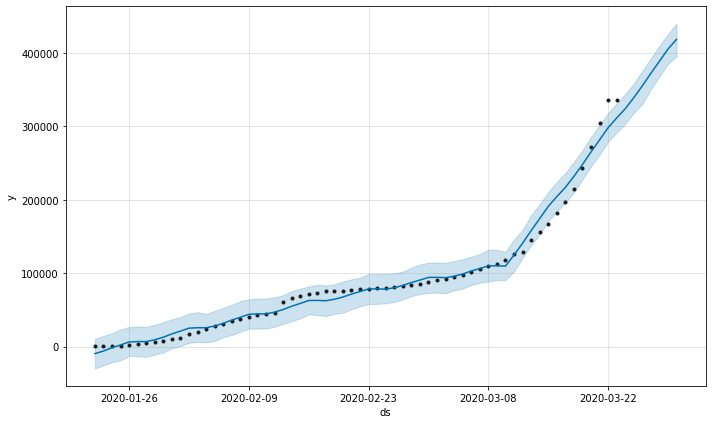

In [ ]:
confirmed_forecast_plot =  m.plot(forecast)

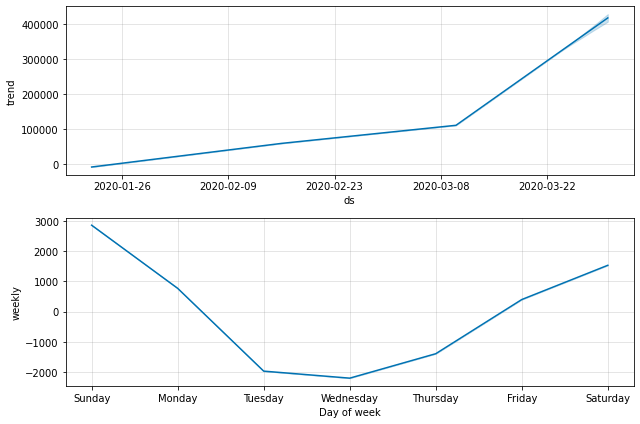

In [ ]:
confirmed_forecast_plot =  m.plot_components(forecast)

In [ ]:
deaths.columns = ['ds', 'y']
deaths['ds']= pd.to_datetime(deaths['ds'])

In [ ]:
m =  Prophet()
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,15411.877522,14775.585417,16037.918363
65,2020-03-27,16199.617603,15610.007212,16831.404894
66,2020-03-28,17006.904589,16379.931125,17675.632589
67,2020-03-29,17831.505383,17172.536093,18495.100259
68,2020-03-30,18490.986176,17817.148666,19215.545502


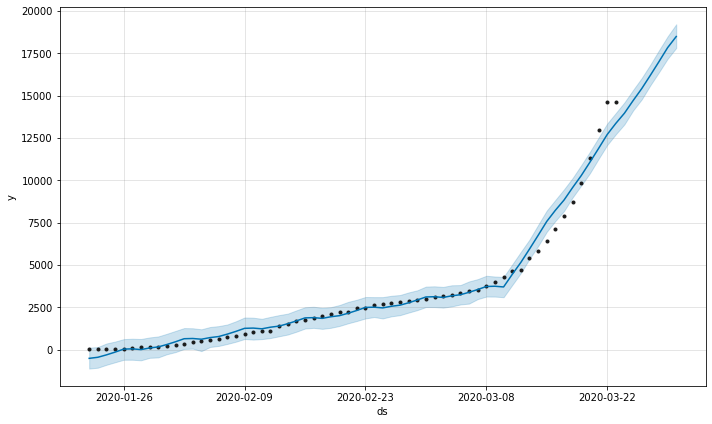

In [ ]:
deaths_forecast_plot =  m.plot(forecast)

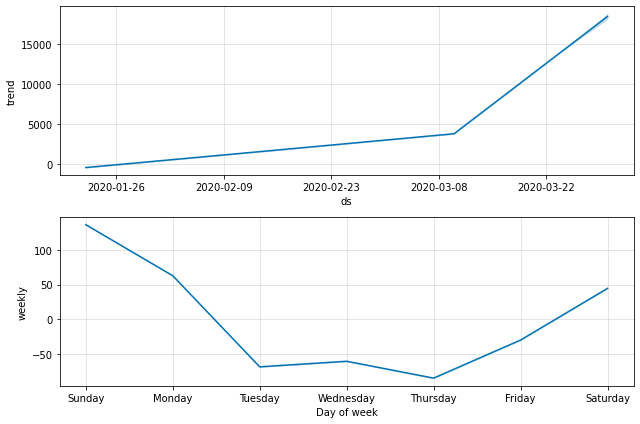

In [ ]:
deaths_forecast_plot =  m.plot_components(forecast)

In [ ]:
recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(recovered['ds'])

In [ ]:
m =  Prophet()
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,103001.349375,101860.047454,104223.507496
65,2020-03-27,105338.022248,104092.343439,106550.336581
66,2020-03-28,108256.307711,106934.887330,109614.800168
67,2020-03-29,111119.292707,109614.363963,112591.114355
68,2020-03-30,113244.957967,111481.362384,114830.089300


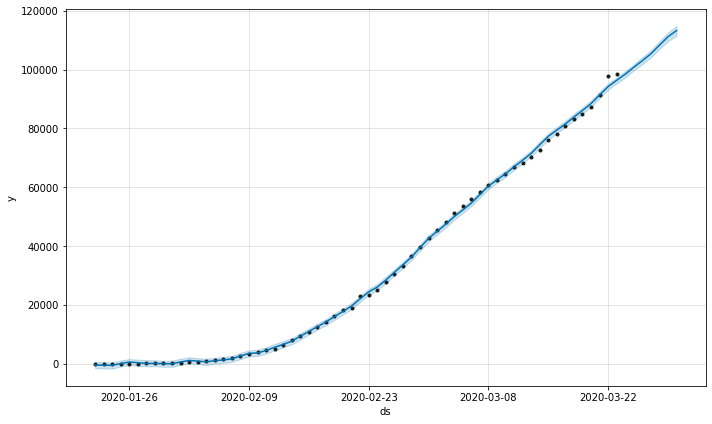

In [ ]:
recovered_forecast_plot =  m.plot(forecast)

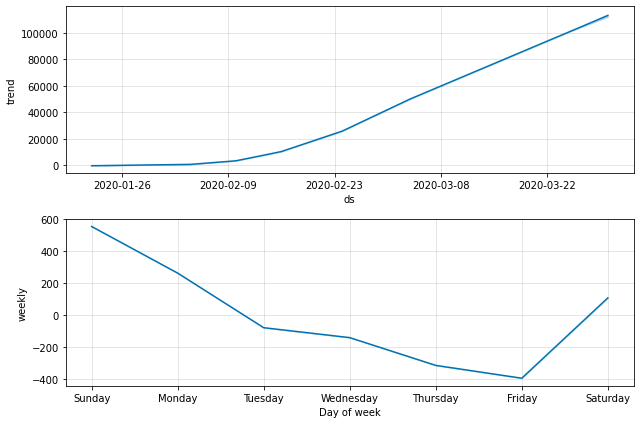

In [ ]:
recovered_forecast_plot =  m.plot_components(forecast)

In [ ]:
india_confirmed.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(india_confirmed['ds'])

In [ ]:
m =  Prophet()
m.fit(india_confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,153.433237,69.724473,238.350975
65,2020-03-27,160.140437,72.123014,239.957174
66,2020-03-28,172.292065,94.550358,255.225162
67,2020-03-29,181.553191,94.663187,263.063480
68,2020-03-30,183.035658,94.861603,265.558524


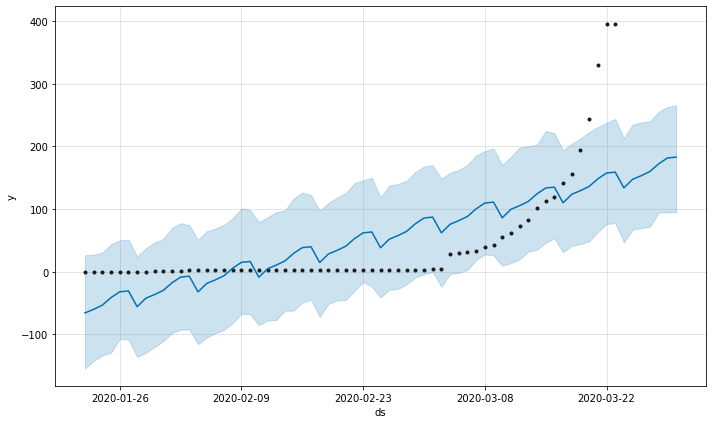

In [ ]:
india_confirmed_forecast_plot =  m.plot(forecast)

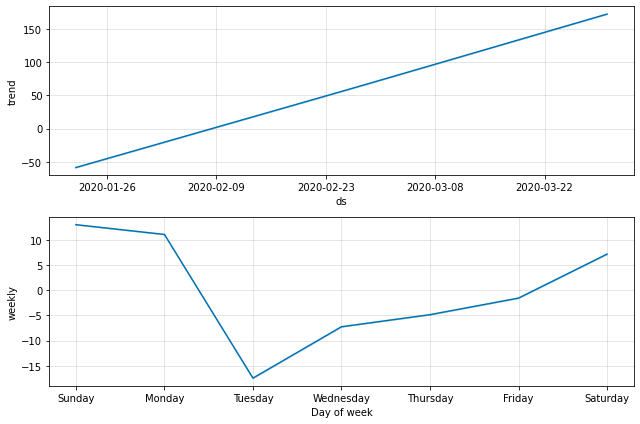

In [ ]:
india_confirmed_forecast_plot =  m.plot_components(forecast)

In [ ]:
india_recovered.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(india_recovered['ds'])
m =  Prophet()
m.fit(india_recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,12.347317,7.137068,17.715105
65,2020-03-27,12.904069,7.403623,18.364400
66,2020-03-28,13.238538,7.979749,18.454248
67,2020-03-29,15.017417,9.493058,20.358811
68,2020-03-30,15.018436,9.484870,20.582430


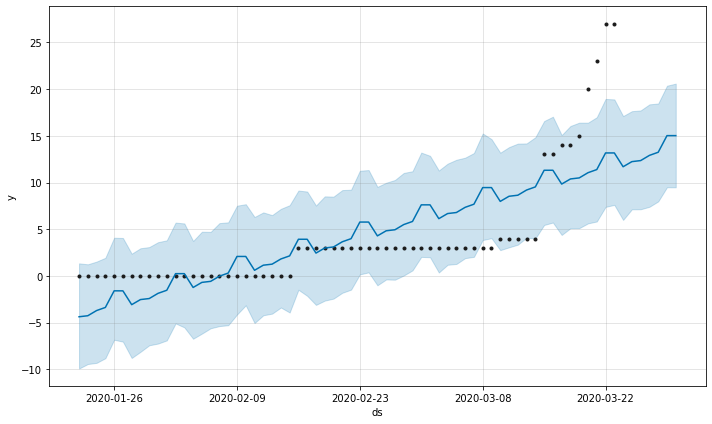

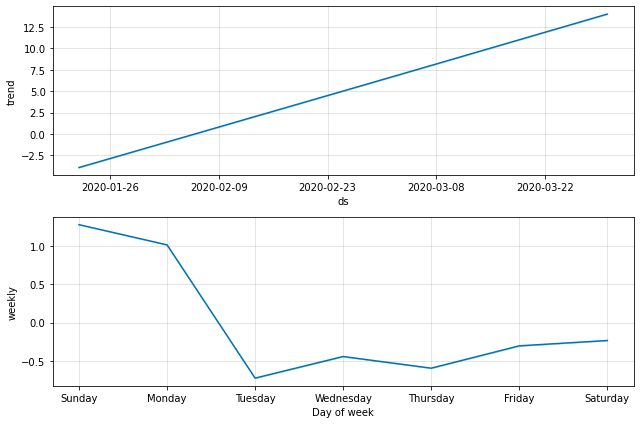

In [ ]:
india_recovered_forecast_plot =  m.plot(forecast)
india_recovered_forecast_plot =  m.plot_components(forecast)

In [ ]:
india_deaths.columns = ['ds', 'y']
recovered['ds']= pd.to_datetime(india_deaths['ds'])
m =  Prophet()
m.fit(india_deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
64,2020-03-26
65,2020-03-27
66,2020-03-28
67,2020-03-29
68,2020-03-30


In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
64,2020-03-26,2.561546,0.921028,4.102414
65,2020-03-27,2.784182,1.170707,4.354120
66,2020-03-28,2.673488,1.079403,4.235984
67,2020-03-29,3.007224,1.464211,4.550476
68,2020-03-30,3.007627,1.426810,4.655631


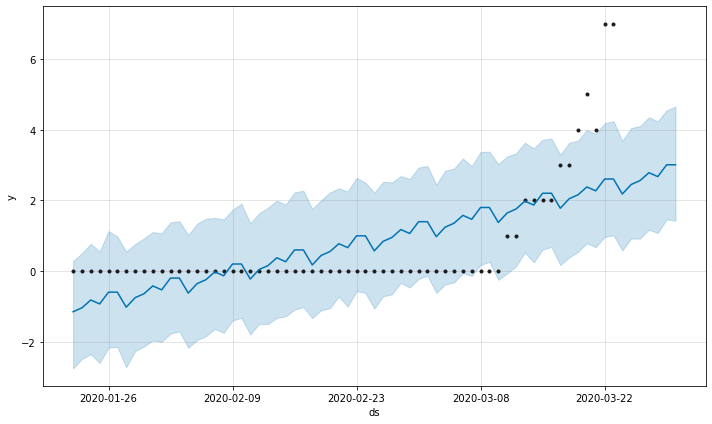

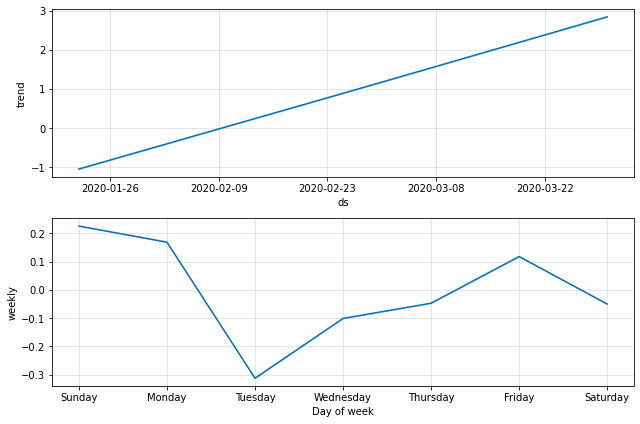

In [ ]:
india_deaths_forecast_plot =  m.plot(forecast)
india_deaths_forecast_plot =  m.plot_components(forecast)